In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime,timedelta
%matplotlib inline

In [81]:
data = pd.read_csv('SalesData.csv')
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


1. Compare Sales by region for 2016 with 2015 using bar chart

In [82]:
df1 = data.groupby(['Region'])[['Sales2016','Sales2015']].sum().add_prefix('Sum_of').reset_index()
df1

,Region,Sum_ofSales2016,Sum_ofSales2015
0,Central,9.787809e+06,7.891729e+06
1,East,1.266723e+07,9.512916e+06
2,West,7.209689e+06,5.349745e+06


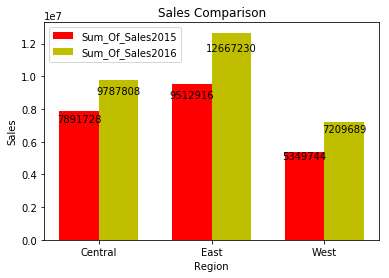

In [83]:
N = 3
width = 0.35
ind = np.arange(N)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, df1.Sum_ofSales2015, width, color='r')
rects2 = ax.bar(ind + width, df1.Sum_ofSales2016, width, color='y')
ax.set_ylabel('Sales')
ax.set_xlabel('Region')
ax.set_title('Sales Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Central','East','West'))
ax.legend((rects1[0], rects2[0]), ('Sum_Of_Sales2015', 'Sum_Of_Sales2016'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.9*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [84]:
df2 = data.groupby(by='Region')[['Sales2016']].sum().add_prefix('Sum_Of')
df2

,Sum_OfSales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


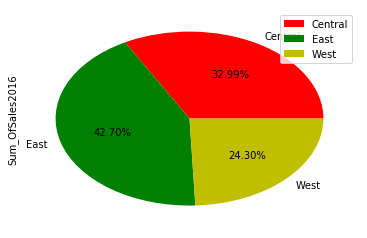

In [85]:
df2.plot(kind='pie',
         subplots=True,
         colors=['r', 'g', 'y'],
         autopct='%1.2f%%', # to get percentage and round off appropriately
         fontsize=10)
plt.show()

3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [86]:
df3 = data.groupby(by=['Region','Tier'])[['Sales2016','Sales2015']].sum().add_prefix('Sum_of').reset_index()
df3

,Region,Tier,Sum_ofSales2016,Sum_ofSales2015
0,Central,High,6.026043e+06,4.798698e+06
1,Central,Low,1.132833e+06,9.434397e+05
2,Central,Med,2.632181e+06,2.068226e+06
3,Central,Out,-3.248530e+03,8.136489e+04
4,East,High,7.817151e+06,6.102946e+06
5,East,Low,1.144930e+06,9.016658e+05
6,East,Med,3.705150e+06,2.470998e+06
7,East,Out,0.000000e+00,3.730655e+04
8,West,High,3.768038e+06,2.944789e+06
9,West,Low,1.099502e+06,6.710644e+05


In [87]:
df5 = df3.melt(id_vars=['Tier','Region'],value_vars=['Sum_ofSales2016','Sum_ofSales2015'])
df5

,Tier,Region,variable,value
0,High,Central,Sum_ofSales2016,6.026043e+06
1,Low,Central,Sum_ofSales2016,1.132833e+06
2,Med,Central,Sum_ofSales2016,2.632181e+06
3,Out,Central,Sum_ofSales2016,-3.248530e+03
4,High,East,Sum_ofSales2016,7.817151e+06
5,Low,East,Sum_ofSales2016,1.144930e+06
6,Med,East,Sum_ofSales2016,3.705150e+06
7,Out,East,Sum_ofSales2016,0.000000e+00
8,High,West,Sum_ofSales2016,3.768038e+06
9,Low,West,Sum_ofSales2016,1.099502e+06


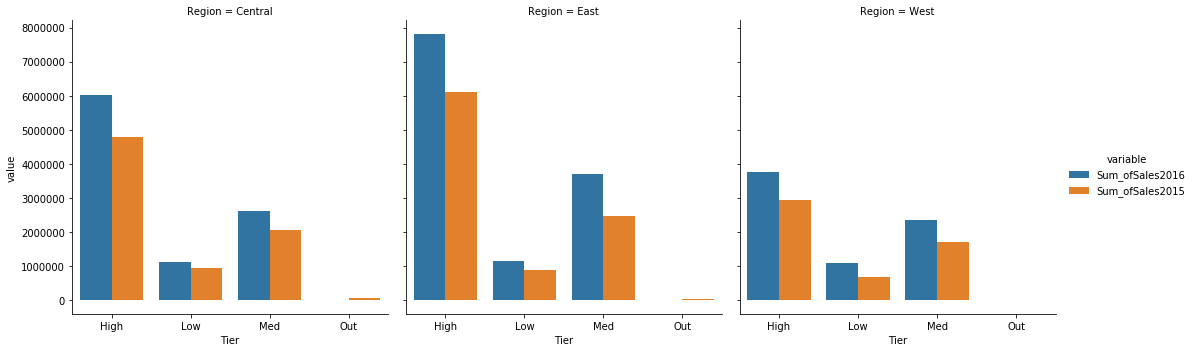

In [146]:
g = sns.catplot(x='Tier', 
                   y='value', 
                   data=df5, 
                    hue='variable', # Color by stage
                   col='Region',  # Separate by stage
                   kind='bar') # Barplot

4. In East region, which state registered a decline in 2016 as compared to 2015?

In [89]:
d6 = data.groupby(by=['Region','State'])[['Sales2015','Sales2016']].sum()
d6 = d6.loc['East']
d6

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


Text(0,0.5,'Sales')

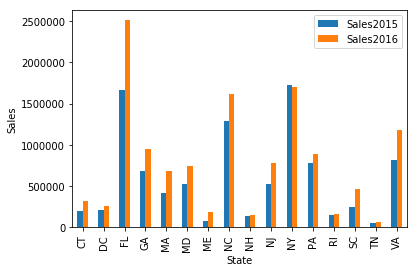

In [90]:
d6.plot(kind='bar')
plt.ylabel('Sales')

The State NY has registered a decline in 2016 compared to 2015.

5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [91]:
df7 = data.groupby(by=['Tier','Division'])[['Units2015','Units2016']].sum()
df7 = df7.loc['High']
df7

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


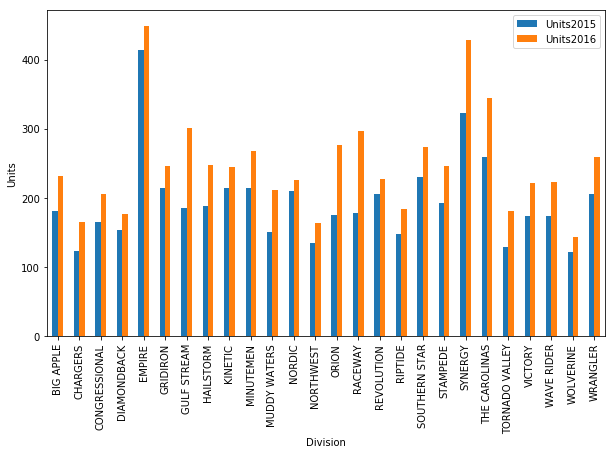

In [92]:
df7.plot(kind='bar',figsize=(10,6))
plt.ylabel('Units')
plt.show()

No Division saw a decline in number of units sold in 2016 compared to 2015.

6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [93]:
def QtrIdentifier(x):
    x = datetime.strptime(x,'%b').month
    if x < 4:
        return 'Q1'
    elif x < 7:
        return 'Q2'
    elif x < 10:
        return 'Q3'
    else:
        return 'Q4'


In [94]:
data['Quarter'] = data.Month.apply(QtrIdentifier)
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


7. Compare Qtr wise sales in 2015 and 2016 in a bar plot 

In [95]:
df8 = data.groupby(by='Quarter')[['Sales2015','Sales2016']].sum()
df8

,Sales2015,Sales2016
Quarter,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


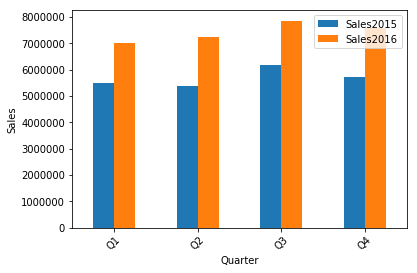

In [96]:
df8.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [97]:
df9 = data.groupby(by=['Quarter','Tier'])[['Sales2016']].sum()
df9.loc['Q3','Out'] = 0.0
df9

Sales2016
Quarter Tier              
Q1      High  3.867719e+06
        Low   9.488328e+05
        Med   2.181402e+06
        Out   0.000000e+00
Q2      High  4.130953e+06
        Low   8.905948e+05
        Med   2.215814e+06
        Out   0.000000e+00
Q3      High  4.872559e+06
        Low   7.951777e+05
        Med   2.197058e+06
        Out   0.000000e+00
Q4      High  4.740002e+06
        Low   7.426594e+05
        Med   2.085207e+06
        Out   0.000000e+00

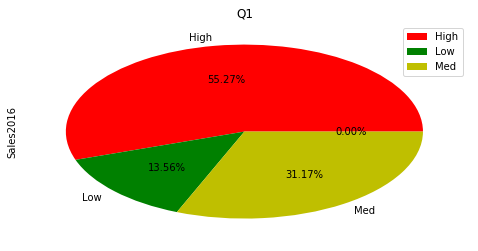

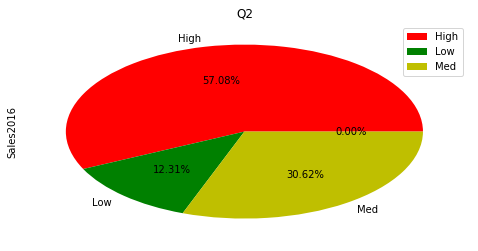

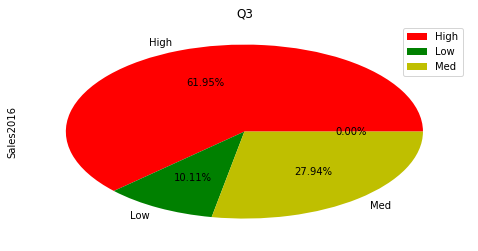

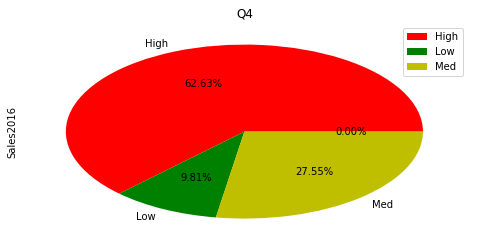

In [98]:
for qtr,df in df9.groupby(level=0):
    df = df.loc[qtr]
    df.plot(kind='pie',
            subplots=True,
            colors=['r', 'g', 'y'],
            autopct='%1.2f%%', # to get percentage and round off appropriately
            fontsize=10,
           figsize=(8, 4))
    plt.title(qtr)
    plt.show()
